In [1]:
%load_ext autoreload
%matplotlib inline

In [11]:
%autoreload 2

import sys,os,glob
import matplotlib
import matplotlib.pyplot as plt

## Add own library to path
workdir = os.getcwd()
thismodule = sys.modules[__name__]
moduledir = os.path.join(os.path.dirname(workdir),'src')
# functionsdir = os.path.join(os.path.dirname(workdir),'plotting/src')
sys.path.insert(0,moduledir)
# sys.path.insert(0,functionsdir)
for includedir in [moduledir,]:
    print("Own modules available:", [os.path.splitext(os.path.basename(x))[0]
                                     for x in glob.glob(os.path.join(includedir,'*.py'))])

# from conditionalstats import *
from plot1D import *

## Graphical parameters
plt.style.use(os.path.join(matplotlib.get_configdir(),'stylelib/presentation.mplstyle'))

Own modules available: ['plot2D', 'plot1D', 'plotCondPDFs', 'plot1DInvLog']


check that the curve bounds match
x bounds: 0.0 99.99
y bounds: 0 40



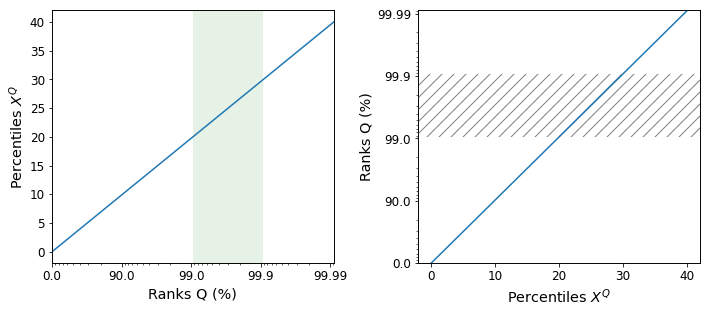

In [15]:
fig,axs = plt.subplots(ncols=2,figsize=(12,4.5))

# ranks = d.ranks
# perc = d.percentiles

ranks = np.array([0,90,99,99.9,99.99])
perc = np.array([0,10,20,30,40])

#--- on IL x axis
ax=axs[0]
ax_show = ax.twiny()

#- set frame
setXaxisIL(ax,ranks)
#- show data
showData(ax_show,ranks,perc)
#- add hatch
# addXHatch(ax_show,d.ranks,[20,30])
addXHatch(ax_show,ranks,[2,3],fill=True,hatch=None,alpha=0.1,color='g')

#- labels
ax.set_xlabel('Ranks Q (%)')
ax.set_ylabel('Percentiles $X^Q$')

print('check that the curve bounds match')
print('x bounds:',ranks[0],ranks[-1])
print('y bounds:',perc[0],perc[-1])
print()

#--- on IL y axis
ax=axs[1]
ax_show = ax.twinx()

#- set frame
setYaxisIL(ax,ranks)
#- show data
showData(ax_show,ranks,perc,axisIL='y')
#- add hatch
addYHatch(ax_show,ranks,[2,3])

#- labels
ax.set_xlabel('Percentiles $X^Q$')
ax.set_ylabel('Ranks Q (%)')

plt.show()

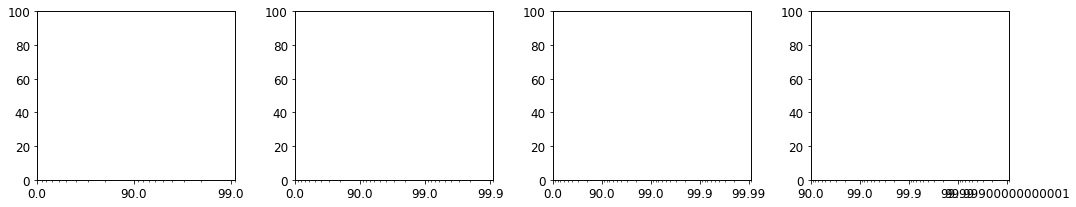

In [18]:
# Check frame

rankmin=0

fig,axs = plt.subplots(ncols=4,figsize=(18,3))

for i in range(4):
    ax = axs[i]
    
    #- duplicate axes for rescaling frame
    ax_frame = ax.twiny()
    
    # set ranks
    k_min = -round(log10(1-rankmin/100))
    k_max = i+2
    dk = 0.1
    scale_invlog = np.arange(k_min,k_max+dk,dk)
    ranks_frame = (1 - np.power(10,-scale_invlog))*100
#     print(k_min,k_max,scale_invlog,ranks_frame)
    
    #- set frame
    setXaxisIL(ax_frame,ranks_frame)
    
#     subplotRanksILog(ax,d.ranks,d.percentiles,rankmin=0,rankmax=99.999)
    
    ax.set_ylim(0,100)
    ax.set_xticks([])
    